In [2]:
import pandas as pd
import numpy as np

# Charts
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Extras
from tqdm import tqdm
import warnings
warnings.filterwarnings(action='ignore')

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

In [3]:
orig_df = pd.read_csv('../data/COVID-19_Case_Surveillance_Public_Use_Data.csv')

In [4]:
orig_df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/06/30,NaN,NaN,Probable Case,Other,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown
1,2020/06/30,NaN,NaN,Probable Case,Other,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown
2,2020/07/05,NaN,NaN,Laboratory-confirmed case,Other,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
3,2020/06/10,NaN,2020/03/27,Probable Case,Other,0 - 9 Years,Unknown,No,Unknown,No,Unknown
4,2020/07/13,NaN,2020/04/20,Probable Case,Other,0 - 9 Years,Unknown,No,Unknown,No,Unknown


In [5]:
orig_df.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
       'death_yn', 'medcond_yn'],
      dtype='object')

In [6]:
orig_df.dtypes

cdc_report_dt                    object
pos_spec_dt                      object
onset_dt                         object
current_status                   object
sex                              object
age_group                        object
Race and ethnicity (combined)    object
hosp_yn                          object
icu_yn                           object
death_yn                         object
medcond_yn                       object
dtype: object

In [7]:
orig_df.sex.value_counts()

Female     2964314
Male       2728309
Unknown      56083
Missing      11229
Other          116
Name: sex, dtype: int64

In [8]:
orig_df.death_yn.value_counts()

No         2662955
Missing    2321809
Unknown     617047
Yes         158255
Name: death_yn, dtype: int64

# Begin EDA

In [9]:
working_df = orig_df.copy(deep=True)

In [10]:
working_df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/06/30,NaN,NaN,Probable Case,Other,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown
1,2020/06/30,NaN,NaN,Probable Case,Other,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown
2,2020/07/05,NaN,NaN,Laboratory-confirmed case,Other,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
3,2020/06/10,NaN,2020/03/27,Probable Case,Other,0 - 9 Years,Unknown,No,Unknown,No,Unknown
4,2020/07/13,NaN,2020/04/20,Probable Case,Other,0 - 9 Years,Unknown,No,Unknown,No,Unknown


In [11]:
working_df.cdc_report_dt = pd.to_datetime(working_df['cdc_report_dt'], format='%Y/%m/%d') # convert date column
working_df.rename(columns={'Race and ethnicity (combined)':'race'},inplace=True) # rename for spaces and punctuation

In [12]:
working_df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-06-30,NaN,NaN,Probable Case,Other,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown
1,2020-06-30,NaN,NaN,Probable Case,Other,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown
2,2020-07-05,NaN,NaN,Laboratory-confirmed case,Other,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
3,2020-06-10,NaN,2020/03/27,Probable Case,Other,0 - 9 Years,Unknown,No,Unknown,No,Unknown
4,2020-07-13,NaN,2020/04/20,Probable Case,Other,0 - 9 Years,Unknown,No,Unknown,No,Unknown


In [13]:
for column in tqdm(working_df.columns):
    print(f'\n{column} value counts:\n')
    print(working_df[column].value_counts())


  0%|          | 0/11 [00:00<?, ?it/s]


cdc_report_dt value counts:

2020-06-24    155484
2020-09-05    117703
2020-05-26     90948
2020-06-10     87186
2020-07-13     79539
               ...  
2020-01-12         1
2020-01-28         1
2020-01-19         1
2020-01-08         1
2020-01-05         1
Name: cdc_report_dt, Length: 286, dtype: int64

pos_spec_dt value counts:



 18%|█▊        | 2/11 [00:00<00:01,  5.34it/s]

2020/04/06    17952
2020/04/07    16850
2020/03/30    16329
2020/04/08    15622
2020/04/03    15465
              ...  
2020/02/06        1
2020/02/10        1
2020/02/18        1
2020/02/16        1
2020/01/04        1
Name: pos_spec_dt, Length: 269, dtype: int64

onset_dt value counts:



 27%|██▋       | 3/11 [00:00<00:02,  3.84it/s]

2020/07/06    26944
2020/07/13    24990
2020/07/07    23878
2020/07/01    23813
2020/07/20    23452
              ...  
2020/01/04        7
2020/01/19        6
2020/01/08        5
2020/01/16        5
2020/01/09        3
Name: onset_dt, Length: 304, dtype: int64

current_status value counts:



 36%|███▋      | 4/11 [00:01<00:02,  2.98it/s]

Laboratory-confirmed case    5462778
Probable Case                 297288
Name: current_status, dtype: int64

sex value counts:



 45%|████▌     | 5/11 [00:01<00:02,  2.67it/s]

Female     2964314
Male       2728309
Unknown      56083
Missing      11229
Other          116
Name: sex, dtype: int64

age_group value counts:



 55%|█████▍    | 6/11 [00:02<00:02,  2.46it/s]

20 - 29 Years    1127849
30 - 39 Years     944365
40 - 49 Years     877761
50 - 59 Years     850025
60 - 69 Years     595487
10 - 19 Years     545036
70 - 79 Years     337082
80+ Years         284973
0 - 9 Years       189430
Unknown             7966
Name: age_group, dtype: int64

race value counts:



 64%|██████▎   | 7/11 [00:02<00:01,  2.30it/s]

Unknown                                                 2344715
White, Non-Hispanic                                     1583387
Hispanic/Latino                                          925883
Black, Non-Hispanic                                      583662
Multiple/Other, Non-Hispanic                             168118
Asian, Non-Hispanic                                      101276
American Indian/Alaska Native, Non-Hispanic               40991
Native Hawaiian/Other Pacific Islander, Non-Hispanic      12024
Name: race, dtype: int64

hosp_yn value counts:



 73%|███████▎  | 8/11 [00:03<00:01,  2.21it/s]

No         2549669
Missing    2048402
Unknown     717791
Yes         444204
Name: hosp_yn, dtype: int64

icu_yn value counts:



 82%|████████▏ | 9/11 [00:03<00:00,  2.19it/s]

Missing    4153363
Unknown     917422
No          634175
Yes          55106
Name: icu_yn, dtype: int64

death_yn value counts:



 91%|█████████ | 10/11 [00:04<00:00,  2.11it/s]

No         2662955
Missing    2321809
Unknown     617047
Yes         158255
Name: death_yn, dtype: int64

medcond_yn value counts:



100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

Missing    3976510
Yes         647375
Unknown     634512
No          501669
Name: medcond_yn, dtype: int64


In [14]:
working_df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-06-30,NaN,NaN,Probable Case,Other,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown
1,2020-06-30,NaN,NaN,Probable Case,Other,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown
2,2020-07-05,NaN,NaN,Laboratory-confirmed case,Other,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
3,2020-06-10,NaN,2020/03/27,Probable Case,Other,0 - 9 Years,Unknown,No,Unknown,No,Unknown
4,2020-07-13,NaN,2020/04/20,Probable Case,Other,0 - 9 Years,Unknown,No,Unknown,No,Unknown


In [15]:
print(working_df.index.name)

None


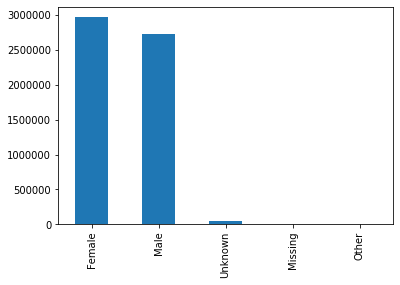

In [16]:
working_df.sex.value_counts().plot(kind='bar')

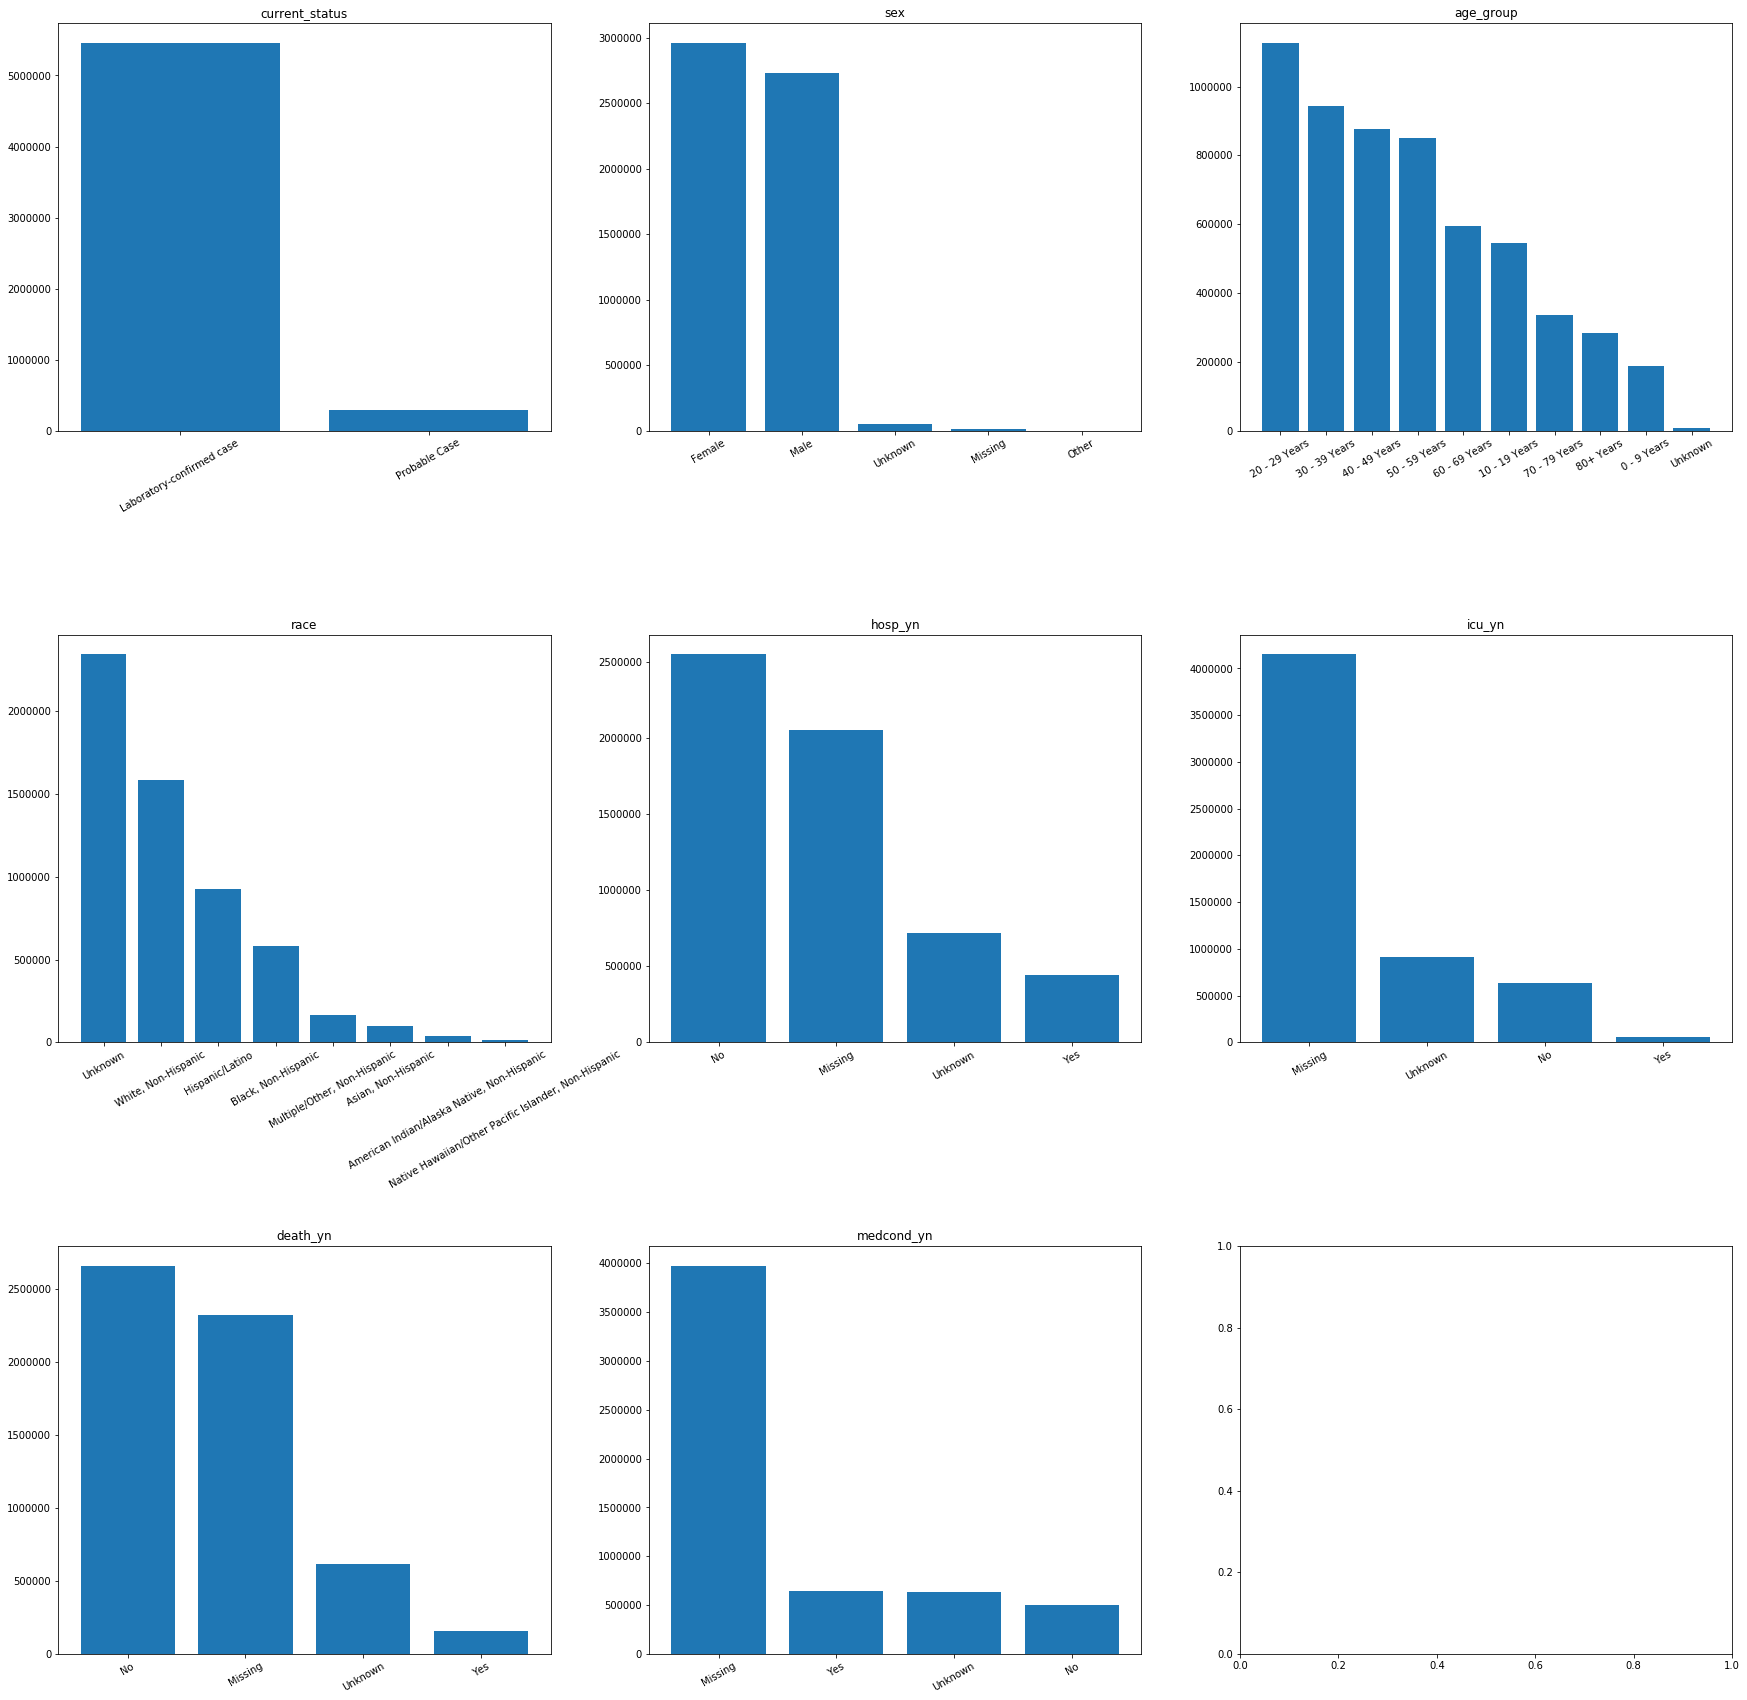

In [17]:
columns = ['current_status', 'sex',
       'age_group', 'race', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']

fig, axs = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(30, 30)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)


for col, ax in zip(columns, axs.flatten()):
    dftemp = working_df[col].value_counts()
    ax.bar(dftemp.index, list(dftemp))
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=30)
plt.show()